We make an image from some text, then reload it as a matrix.

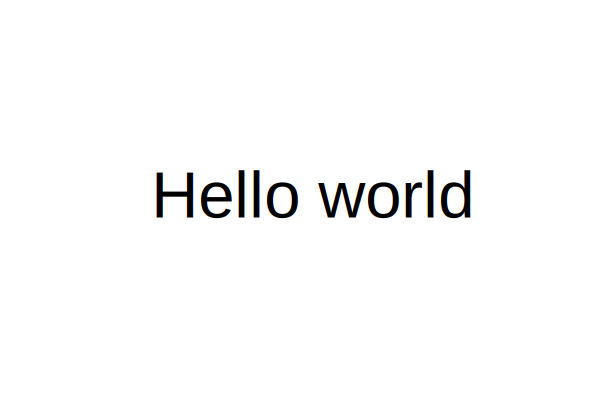

In [1]:
using Plots
plot([],[],leg=:none,annotations=(0.5,0.5,text("Hello world",44,:center,:middle)),
    grid=:none,frame=:none)

In [2]:
savefig("hello.png")

using Images
img = load("hello.png")
A = @. Float64(Gray(img));
@show m,n = size(A);

┌ Info: Recompiling stale cache file /Users/driscoll/.julia/compiled/v1.0/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/driscoll/.julia/compiled/v1.0/ImageMagick/0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1190


(m, n) = size(A) = (400, 600)


Next we show that the singular values decrease exponentially, until they reach zero (more precisely, are about $\sigma_1 \varepsilon_\text{mach}$). For all numerical purposes, this determines the rank of the matrix.

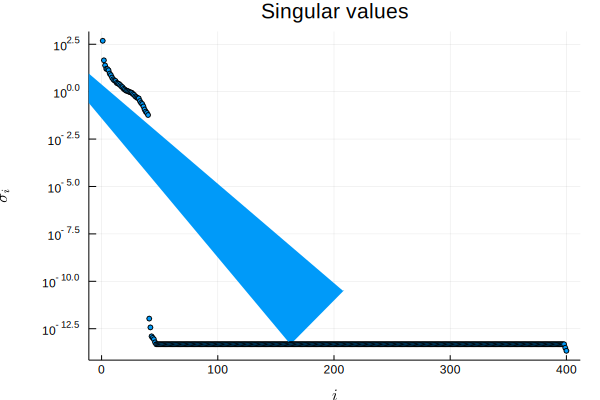

In [5]:
using LinearAlgebra
U,sigma,V = svd(A)

scatter(sigma,m=(:o,2),
    title="Singular values",xaxis=("\$i\$"), yaxis=(:log10,"\$\\sigma_i\$"),leg=:none )

In [6]:
r = findlast(@.sigma/sigma[1] > 10*eps())

41

The rapid decrease suggests that we can get fairly good low-rank approximations. 

,
,

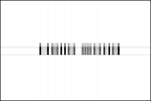
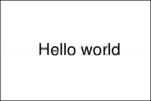
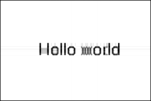
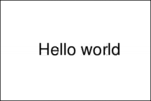

In [7]:
Ak = [ U[:,1:k]*diagm(0=>sigma[1:k])*V[:,1:k]' for k=2*(1:4) ]
reshape( [ @.Gray(Ak[i]) for i=1:4 ],2,2)

Consider how little data is needed to reconstruct these images. For rank 8, for instance, we have 8 left and right singular vectors plus 8 singular values, for a compression ratio of better than 25:1.  

In [8]:
compression = 8*(m+n+1) / (m*n)

0.03336666666666667